# Logistic Regression

## Load Data

In [1]:
from pathlib import Path
import numpy as np
import random
import pandas as pd

In [2]:
from sklearn.utils import shuffle

base_directory = Path(r'/media/thor/PortableSSD/mydata/emojihero/dataset/dataset-face-expression-csv')
train_df = pd.read_csv(base_directory / 'training_set.csv')
val_df = pd.read_csv(base_directory / 'validation_set.csv')

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

train_df = shuffle(train_df, random_state=SEED)
val_df = shuffle(val_df, random_state=SEED)

print(f'Number of Training Samples: {len(train_df)}')
print(train_df['Label'].value_counts())
print(f'Number of Validation Samples: {len(val_df)}')
print(val_df['Label'].value_counts())

train_df.head()

Number of Training Samples: 964
Label
0    197
1    191
3    172
2    131
4    105
5    102
6     66
Name: count, dtype: int64
Number of Validation Samples: 385
Label
5    55
4    55
1    55
2    55
6    55
0    55
3    55
Name: count, dtype: int64


,timestamp,participant_id,FAU_0,FAU_1,FAU_2,FAU_3,FAU_4,FAU_5,FAU_6,FAU_7,...,FAU_54,FAU_55,FAU_56,FAU_57,FAU_58,FAU_59,FAU_60,FAU_61,FAU_62,Label
760,1700488114760,3,0.107896,0.194889,1.401298e-45,1.320220e-22,0.024912,0.024321,1.401298e-45,1.401298e-45,...,9.209801e-21,2.610711e-37,1.000182e-13,5.099260e-05,1.002689e-02,4.672041e-07,2.050273e-07,5.688704e-02,8.172417e-02,4
884,1700748819058,16,0.834857,0.764817,1.026462e-20,2.168397e-11,0.416924,0.377339,2.632983e-03,1.401298e-45,...,2.479763e-03,2.194700e-01,2.563659e-01,1.888640e-06,5.865657e-03,8.533958e-10,2.958799e-04,1.071407e-02,2.710130e-02,5
938,1701357565849,34,0.131417,0.130338,1.680341e-04,1.439196e-04,0.252091,0.225658,0.000000e+00,0.000000e+00,...,1.401298e-45,1.083556e-02,1.089628e-02,2.802597e-45,1.980103e-34,1.401298e-45,1.401298e-45,2.718902e-01,2.924575e-01,5
901,1700827807807,21,0.615232,0.514535,9.174733e-03,9.058302e-03,0.389754,0.374438,0.000000e+00,0.000000e+00,...,2.141047e-02,9.831126e-01,9.945938e-01,8.538091e-03,4.727362e-02,9.986752e-05,4.469715e-06,3.522862e-01,4.055933e-01,5
622,1700748690839,16,0.000001,0.000020,1.059425e-02,1.085821e-02,0.010866,0.000002,1.401298e-45,0.000000e+00,...,7.473406e-12,5.651674e-10,1.086265e-02,1.238884e-02,9.620150e-03,1.538864e-01,1.280742e-01,1.139681e-12,6.957371e-13,3


In [3]:
import numpy as np
from sklearn.model_selection import PredefinedSplit

X_train = train_df.drop(['Label', 'timestamp', 'participant_id'], axis=1)
y_train = train_df['Label']
X_val = val_df.drop(['Label', 'timestamp', 'participant_id'], axis=1)
y_val = val_df['Label']
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

train_indices = -1 * np.ones(len(train_df), dtype=int)
val_indices = np.zeros(len(val_df), dtype=int)
split_index = np.concatenate((train_indices, val_indices))
ps = PredefinedSplit(split_index)

## Find optimal Hyperparameters via GridSearch

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=SEED))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__max_iter': [10, 100, 1000, 10000],
    'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'logreg__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=ps, refit=False, scoring='accuracy', n_jobs=-1, verbose=2)

In [5]:
import time

start_time = time.time()
grid_search.fit(X_combined, y_combined)
end_time = time.time()

print(f'GridSearch took: {end_time - start_time:.2f} seconds.')

Fitting 1 folds for each of 192 candidates, totalling 192 fits


/home/thor/Desktop/repos/emoji-hero-baseline/1_face_expressions/machine-learning/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/thor/Desktop/repos/emoji-hero-baseline/1_face_expressions/machine-learning/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thor/Desktop/repos/emoji-hero-baseline/1_face_expressions/machine-learning/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: Convergenc

GridSearch took: 7.11 seconds.


In [6]:
best_parameters = grid_search.best_params_
print('Best Parameters:', best_parameters)
print('Best Cross-Validation-Accuracy:', grid_search.best_score_)

Best Parameters: {'logreg__C': 0.1, 'logreg__class_weight': 'balanced', 'logreg__max_iter': 1000, 'logreg__solver': 'saga'}
Best Cross-Validation-Accuracy: 0.8233766233766234


## Evaluation

In [7]:
best_parameters = {k.replace('logreg__', ''): v for k, v in best_parameters.items()}

best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(**best_parameters, random_state=SEED))
])

best_model.fit(X_train, y_train)
print(f'Trained model on training set with optimal hyperparameters: {best_parameters}')

Trained model on training set with optimal hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'saga'}


In [8]:
from sklearn.metrics import accuracy_score

y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy with optimized Hyperparameters: {val_accuracy:.4f}")

Validation Accuracy with optimized Hyperparameters: 0.8234


In [9]:
test_df = pd.read_csv(base_directory / 'test_set.csv')
print(f'Number of Test Samples: {len(test_df)}')
X_test, y_test = test_df.drop(['Label', 'timestamp', 'participant_id'], axis=1), test_df['Label']

Number of Test Samples: 378


In [10]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with optimized Hyperparameters: {test_accuracy:.4f}")

Test Accuracy with optimized Hyperparameters: 0.7302


In [11]:
from sklearn.metrics import classification_report

emotion_to_id = {'Neutral': 0, 'Happiness': 1, 'Sadness': 2, 'Surprise': 3, 'Fear': 4, 'Disgust': 5, 'Anger': 6}

print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=emotion_to_id.keys(), digits=4))

Classification Report (Test Set):
              precision    recall  f1-score   support

     Neutral     0.6667    0.8889    0.7619        54
   Happiness     0.7794    0.9815    0.8689        54
     Sadness     0.9302    0.7407    0.8247        54
    Surprise     0.8889    0.7407    0.8081        54
        Fear     0.6500    0.7222    0.6842        54
     Disgust     0.5424    0.5926    0.5664        54
       Anger     0.7742    0.4444    0.5647        54

    accuracy                         0.7302       378
   macro avg     0.7474    0.7302    0.7256       378
weighted avg     0.7474    0.7302    0.7256       378



Confusion Matrix, without normalization
[[48  2  1  0  3  0  0]
 [ 0 53  0  0  1  0  0]
 [ 8  0 40  0  2  1  3]
 [ 3  0  0 40 10  1  0]
 [ 6  3  0  2 39  3  1]
 [ 1  8  2  3  5 32  3]
 [ 6  2  0  0  0 22 24]]


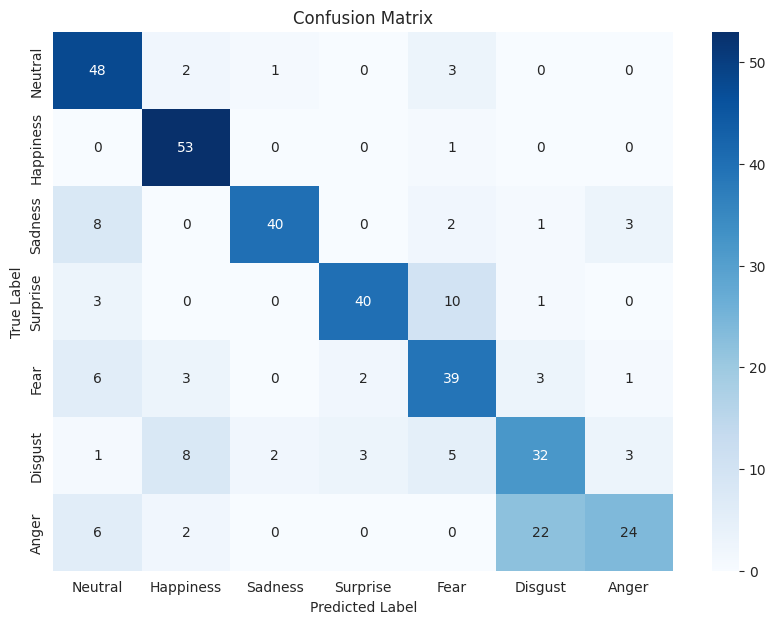

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap=cmap,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


plot_confusion_matrix(y_test, y_test_pred, classes=emotion_to_id.keys(), title='Confusion Matrix')